In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv('Default.csv')

In [3]:
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

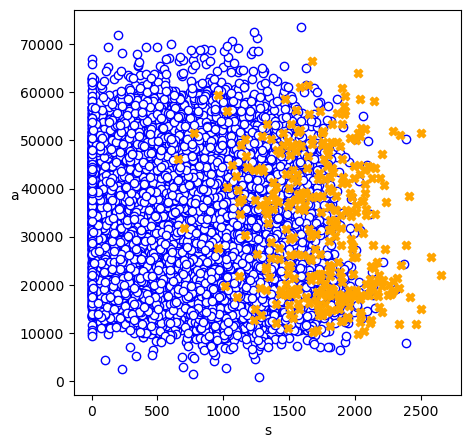

In [4]:
plt.style.use('default')
non_default = df[df.default=='No']
default = df[df.default=='Yes']
plt.figure(figsize=(5, 5))
plt.scatter(non_default.balance, non_default.income, c='white', marker='o', edgecolor='blue')
plt.scatter(default.balance, default.income, c='orange', marker='X', edgecolor='orange')
plt.xlabel('s', fontsize=10)
plt.ylabel('a', rotation = 'horizontal')
plt.show()

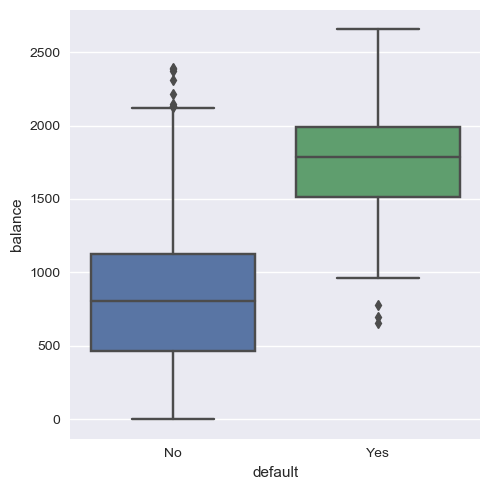

In [5]:
plt.style.use('seaborn')
sns.catplot(x='default', y='balance', kind='box', data=df)

In [6]:
df['default'] = (df['default'] == 'Yes').astype(np.int)

In [7]:
df

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879
...,...,...,...,...
9995,0,No,711.555020,52992.378914
9996,0,No,757.962918,19660.721768
9997,0,No,845.411989,58636.156984
9998,0,No,1569.009053,36669.112365


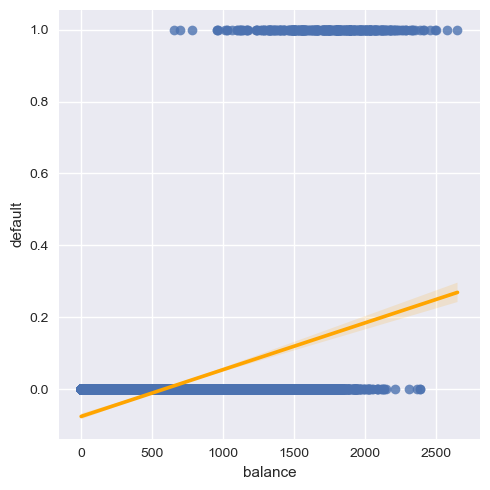

In [8]:
sns.lmplot(x='balance', y='default', data=df, line_kws={'color':'orange'})

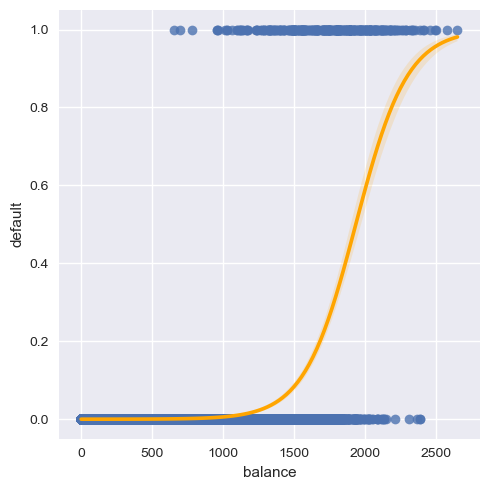

In [9]:
sns.lmplot(x='balance', y='default', data=df, logistic=True, line_kws={"color":'orange'})

In [10]:
result = smf.logit('default ~ balance', data=df).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 31 May 2020   Pseudo R-squ.:                  0.4534
Time:                        20:34:10   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
smf.logit('default ~ student', data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 31 May 2020   Pseudo R-squ.:                0.004097
Time:                        20:34:11   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

In [12]:
clf = LogisticRegression()
clf_2 = LogisticRegression()
X_train = df.balance.values.reshape(-1, 1)
y = df.default.astype(int)
clf.fit(X_train, y)
print(clf.intercept_)
print(clf.coef_)
clf.classes_

[-10.65132824]
[[0.00549892]]


array([0, 1])

In [13]:
clf.predict_proba(np.array([[2000]]))

array([[0.41423073, 0.58576927]])

In [14]:
X_train

array([[ 729.52649521],
       [ 817.18040655],
       [1073.54916401],
       ...,
       [ 845.41198922],
       [1569.00905338],
       [ 200.92218264]])

In [15]:
X_train = df[df.student == 'Yes'].balance.values.reshape(-1, 1)
y = df[df.student == 'Yes'].default
X_train2 = df[df.student == 'No'].balance.values.reshape(-1, 1)
y2 = df[df.student == 'No'].default

clf.fit(X_train ,y)
clf_2.fit(X_train2, y2)

X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1, 1)
prob = clf.predict_proba(X_test)
prob_2 = clf_2.predict_proba(X_test)

In [16]:
df.groupby(['student', 'default'])['default'].count().unstack('student')

student,No,Yes
default,,
0,6850,2817
1,206,127


In [17]:
prob

array([[9.99986676e-01, 1.33242521e-05],
       [9.99986601e-01, 1.33990653e-05],
       [9.99986526e-01, 1.34742986e-05],
       ...,
       [2.60046446e-02, 9.73995355e-01],
       [2.58632019e-02, 9.74136798e-01],
       [2.57225082e-02, 9.74277492e-01]])

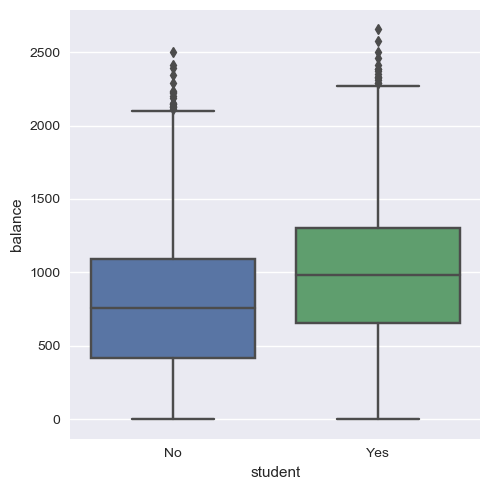

In [18]:
sns.catplot(x='student', y='balance', data=df, kind='box')

In [19]:
df

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879
...,...,...,...,...
9995,0,No,711.555020,52992.378914
9996,0,No,757.962918,19660.721768
9997,0,No,845.411989,58636.156984
9998,0,No,1569.009053,36669.112365


In [25]:
df['student_2'] = (df.student == 'Yes').astype('int')

In [31]:
X = df.loc[:, ['balance', 'income', 'student_2']].values

In [48]:
y = df.default.values

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
lda = LDA().fit(X, y)

In [57]:
y_pred = lda.predict(X)

In [59]:
df_ = pd.DataFrame({'y_pred' : y_pred, 'ground_truth' : y})

In [68]:
df_.groupby(['y_pred', 'ground_truth']).size().unstack("ground_truth")

ground_truth,0,1
y_pred,,
0,9645,254
1,22,79


In [71]:
confusion_matrix(y_pred, y).flatten()

array([9645,  254,   22,   79], dtype=int64)

In [73]:
confusion_matrix(y, y_pred)

array([[9645,   22],
       [ 254,   79]], dtype=int64)

In [76]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9667
           1       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



In [78]:
y_pred.shape

(10000,)

In [79]:
y_prob = lda.predict_proba(X)

In [85]:
y_prob

array([[9.96776483e-01, 3.22351679e-03],
       [9.97310469e-01, 2.68953132e-03],
       [9.85291400e-01, 1.47085998e-02],
       ...,
       [9.93867912e-01, 6.13208754e-03],
       [8.62826402e-01, 1.37173598e-01],
       [9.99846451e-01, 1.53549027e-04]])

In [89]:
df_ = pd.DataFrame(dict(y = y, y_prob = y_prob[:, 1]))

In [102]:
df_.y_prob = (df_.y_prob > 0.2).astype('int')

In [203]:
xx = df_.groupby(['y', 'y_prob']).size().unstack('y')

In [204]:
xx

y,0,1
y_prob,,
0,9435,140
1,232,193


In [205]:
xx

y,0,1
y_prob,,
0,9435,140
1,232,193


In [206]:
xx.loc[2] = [0, 0]

In [207]:
xx

y,0,1
y_prob,,
0,9435,140
1,232,193
2,0,0


In [209]:
np.sum(xx.iloc[:, 0])

9667

In [210]:
for i in range(len(xx) - 1):
    xx.iloc[-1, i] = xx.iloc[i, i] / np.sum(xx.iloc[:, i])